In [ ]:
%pip install cv2
%pip install pillow

In [ ]:
# Compute NPCR and UACI
def calculate_npcr(image1, image2):
    diff = (image1 != image2).astype(np.uint8)
    npcr = np.sum(diff) / image1.size * 100
    return npcr

def calculate_uaci(image1, image2):
    diff = np.abs(image1 - image2).astype(np.float32)
    uaci = np.sum(diff) / (255 * image1.size) * 100
    return uaci

# Main function to test NPCR and UACI
if __name__ == "__main__":
    # Define image paths
    original_image_path = 'C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/imresizer-1732212939706.jpg'
    modified_image_path = 'C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/slider2.webp'
    
    # Load the original image
    image = Image.open(original_image_path).convert("L")
    image_array = np.array(image)
    
    # Create a modified image (change specific pixels)
    modified_image = image_array.copy()
    modified_image[20, 30] = (modified_image[0, 0] + 1) % 256  # Ensure values stay in range

    # Generate dynamic keys for the original image
    avg_intensity_original, variance_original, entropy_original = compute_image_characteristics(image_array)
    chen_keys_original = generate_chen_keys(image_array.size, avg_intensity_original, variance_original)
    lorenz_keys_original = generate_lorenz_keys(image_array.size, avg_intensity_original, entropy_original)
    logistic_keys_original = generate_logistic_keys(image_array.size, variance_original, entropy_original)
    hybrid_keys_original = (chen_keys_original + lorenz_keys_original + logistic_keys_original) % 256

    # Generate dynamic keys for the modified image
    avg_intensity_modified, variance_modified, entropy_modified = compute_image_characteristics(modified_image)
    chen_keys_modified = generate_chen_keys(modified_image.size, avg_intensity_modified, variance_modified)
    lorenz_keys_modified = generate_lorenz_keys(modified_image.size, avg_intensity_modified, entropy_modified)
    logistic_keys_modified = generate_logistic_keys(modified_image.size, variance_modified, entropy_modified)
    hybrid_keys_modified = (chen_keys_modified + lorenz_keys_modified + logistic_keys_modified) % 256

    # Generate S-box for the original image
    sbox_original = generate_dynamic_sbox(256, hybrid_keys_original)
    sbox_inv_original = np.argsort(sbox_original)

    # Generate S-box for the modified image
    sbox_modified = generate_dynamic_sbox(256, hybrid_keys_modified)
    sbox_inv_modified = np.argsort(sbox_modified)

    # Encrypt the original and modified images
    encrypted_image_original, _, _ = encrypt_image_enhanced(image_array, hybrid_keys_original, sbox_original)
    encrypted_image_modified, _, _ = encrypt_image_enhanced(modified_image, hybrid_keys_modified, sbox_modified)

    # Compute NPCR and UACI
    npcr = calculate_npcr(encrypted_image_original, encrypted_image_modified)
    uaci = calculate_uaci(encrypted_image_original, encrypted_image_modified)

    # Print NPCR and UACI values
    print(f"NPCR: {npcr:.2f}%")
    print(f"UACI: {uaci:.2f}%")

    # Display results
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(image_array, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.title("Modified Image")
    plt.imshow(modified_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.title("Encrypted Original Image")
    plt.imshow(encrypted_image_original, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.title("Encrypted Modified Image")
    plt.imshow(encrypted_image_modified, cmap="gray")
    plt.axis("off")

    plt.show()


In [ ]:
def calculate_entropy(image):
    histogram = np.histogram(image.flatten(), bins=256, range=(0, 256))[0]
    histogram = histogram / np.sum(histogram)  # Normalize histogram
    entropy = -np.sum(histogram * np.log2(histogram + 1e-12))  # Add small value to avoid log(0)
    return entropy

if __name__ == "__main__":
    # Calculate entropy for the original and encrypted images
    entropy_original = calculate_entropy(image_array)
    entropy_encrypted = calculate_entropy(encrypted_image_original)

    print(f"Entropy of Original Image: {entropy_original:.4f}")
    print(f"Entropy of Encrypted Image: {entropy_encrypted:.4f}")


In [ ]:
def plot_histogram(image, title):
    histogram = np.histogram(image.flatten(), bins=256, range=(0, 256))[0]
    plt.bar(range(256), histogram, color="blue", alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
# Uniformity check for histogram
def plot_histogram_uniformity(image, title):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0, 256))
    plt.bar(range(256), histogram, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram_uniformity(encrypted_image_original, "Histogram of Encrypted Image")


if __name__ == "__main__":
    plt.figure(figsize=(12, 6))

    # Histogram of Original Image
    plt.subplot(1, 2, 1)
    plot_histogram(image_array, "Histogram of Original Image")

    # Histogram of Encrypted Image
    plt.subplot(1, 2, 2)
    plot_histogram(encrypted_image_original, "Histogram of Encrypted Image")

    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_correlation(image):
    rows, cols = image.shape
    x = image[:, :-1].flatten()  # Exclude last column
    y = image[:, 1:].flatten()   # Exclude first column
    correlation = np.corrcoef(x, y)[0, 1]
    return correlation

if __name__ == "__main__":
    # Calculate correlation for original and encrypted images
    correlation_original = calculate_correlation(image_array)
    correlation_encrypted = calculate_correlation(encrypted_image_original)

    print(f"Correlation of Original Image: {correlation_original:.4f}")
    print(f"Correlation of Encrypted Image: {correlation_encrypted:.4f}")


In [ ]:
def modify_key(hybrid_keys):
    modified_keys = hybrid_keys.copy()
    modified_keys[0] = (modified_keys[0] + 1) % 256  # Slight modification in the key
    return modified_keys

if __name__ == "__main__":
    # Modify the hybrid keys
    modified_hybrid_keys = modify_key(hybrid_keys_original)
    
    # Encrypt the image with the modified keys
    encrypted_with_modified_keys, _, _ = encrypt_image(image_array, modified_hybrid_keys, sbox_original)
    
    # Compute NPCR and UACI between the original encrypted and the modified-key encrypted images
    npcr_key_sensitivity = calculate_npcr(encrypted_image_original, encrypted_with_modified_keys)
    uaci_key_sensitivity = calculate_uaci(encrypted_image_original, encrypted_with_modified_keys)

    print(f"Key Sensitivity NPCR: {npcr_key_sensitivity:.2f}%")
    print(f"Key Sensitivity UACI: {uaci_key_sensitivity:.2f}%")


In [ ]:
if __name__ == "__main__":
    # Compute NPCR and UACI (already included in your NPCR/UACI implementation)
    npcr_avalanche = calculate_npcr(encrypted_image_original, encrypted_image_modified)
    uaci_avalanche = calculate_uaci(encrypted_image_original, encrypted_image_modified)

    print(f"Avalanche Effect NPCR: {npcr_avalanche:.2f}%")
    print(f"Avalanche Effect UACI: {uaci_avalanche:.2f}%")


In [ ]:
def calculate_mse(image1, image2):
    mse = np.mean((image1.astype(np.float32) - image2.astype(np.float32))**2)
    return mse

def calculate_psnr(image1, image2):
    mse = calculate_mse(image1, image2)
    psnr = 10 * np.log10((255**2) / mse) if mse != 0 else float('inf')
    return psnr

if __name__ == "__main__":
    mse = calculate_mse(image_array, encrypted_image_original)
    psnr = calculate_psnr(image_array, encrypted_image_original)
    
    print(f"MSE: {mse:.4f}")
    print(f"PSNR: {psnr:.4f} dB")


In [ ]:
import numpy as np
from PIL import Image
import pywt
import wave
import struct

def compute_image_characteristics(image_array):
    avg_intensity = np.mean(image_array)  # Average pixel intensity
    variance = np.var(image_array)  # Variance of pixel intensity
    histogram, _ = np.histogram(image_array, bins=256, range=(0, 255))
    probabilities = histogram / np.sum(histogram)
    entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation
    return avg_intensity, variance, entropy

def determine_block_size(image_shape):
    print(image_shape)
    height, width = image_shape
    smaller_dim = min(height, width)

    if smaller_dim < 512:
        return 16  # Small images
    elif smaller_dim <= 2048:
        return 64  # Medium images
    else:
        return 128  # Large images


def divide_into_blocks(image_array, block_size):
    height, width = image_array.shape
    padded_height = (height + block_size - 1) // block_size * block_size
    padded_width = (width + block_size - 1) // block_size * block_size


    padded_image = np.zeros((padded_height, padded_width), dtype=image_array.dtype)
    padded_image[:height, :width] = image_array

    blocks = []
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            blocks.append(padded_image[i:i + block_size, j:j + block_size])
    return blocks, (height, width), (padded_height, padded_width)



def merge_blocks(blocks, original_shape, padded_shape, block_size):
    padded_height, padded_width = padded_shape
    merged_image = np.zeros((padded_height, padded_width), dtype=blocks[0].dtype)

    block_index = 0
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            merged_image[i:i + block_size, j:j + block_size] = blocks[block_index]
            block_index += 1

    # Crop back to the original shape
    return merged_image[:original_shape[0], :original_shape[1]]


def generate_chen_keys(size, avg_intensity, variance):
    x, y, z = avg_intensity / 255, variance / 255, 0.1  # Dynamic initialization
    a, b, c = 35 + avg_intensity % 10, 3 + variance % 5, 28  # Adjusted parameters
    keys = []
    for _ in range(size):
        dx = a * (y - x)
        dy = x * (c - z) - y
        dz = x * y - b * z
        x, y, z = x + dx * 0.01, y + dy * 0.01, z + dz * 0.01
        keys.append(x)
    return np.abs(np.array(keys)) % 256  # Normalize keys to range [0, 255]

def generate_lorenz_keys(size, avg_intensity, entropy):
    x, y, z = avg_intensity / 255, 0.5, entropy / 10  # Dynamic initialization
    sigma, rho, beta = 10 + entropy % 5, 28 + avg_intensity % 10, 2.667
    keys = []
    for _ in range(size):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        x, y, z = x + dx * 0.01, y + dy * 0.01, z + dz * 0.01
        keys.append(y)
    return np.abs(np.array(keys)) % 256  
def generate_logistic_keys(size, variance, entropy):
    x = np.clip(variance / 255, 0.01, 0.99)  
    r = np.clip(3.99 - (entropy % 0.1), 3.57, 4.0)  
    keys = []
    for _ in range(size):
        x = r * x * (1 - x)  
        keys.append(x)
    return (np.array(keys) * 255).astype(np.uint8)


def image_to_audio(dna_encoded_string, output_audio_path):
   
    binary_data = bytes(int(dna_encoded_string[i:i+8], 2) for i in range(0, len(dna_encoded_string), 8))
    
    with wave.open(output_audio_path, 'w') as audio_file:
        audio_file.setnchannels(1)
        audio_file.setsampwidth(1)
        audio_file.setframerate(44100)
        audio_file.writeframes(binary_data)


def audio_to_image(input_audio_path, shape):
    with wave.open(input_audio_path, 'r') as audio_file:
        frames = audio_file.readframes(audio_file.getnframes())

    dna_encoded_string = ''.join(f"{byte:08b}" for byte in frames)

    decoded_image_array = dna_decode(dna_encoded_string[:shape[0]*shape[1]*8], shape)
    
    return decoded_image_array

def generate_dynamic_sbox(size, hybrid_keys):
    chaotic_sequence = hybrid_keys[:size]
    return np.argsort(chaotic_sequence)

def encrypt_block_cbc(block, hybrid_keys, sbox, previous_block):
    flat_block = block.flatten()

    xor_block = flat_block ^ previous_block.flatten()

    permutation_indices = np.argsort(hybrid_keys[:len(flat_block)])
    permuted_block = xor_block[permutation_indices]
    substituted_block = sbox[permuted_block]

    return substituted_block.reshape(block.shape), substituted_block, permutation_indices


def decrypt_block_cbc(block, previous_block, permutation_indices, sbox_inv):
    flat_block = block.flatten()

    substituted_block = np.array([sbox_inv[pixel] for pixel in flat_block])

    reverse_indices = np.argsort(permutation_indices)
    permuted_block = substituted_block[reverse_indices]


    decrypted_block = permuted_block ^ previous_block.flatten()

    return decrypted_block.reshape(block.shape)



def main(image_path):
    # Load image
    image = Image.open(image_path).convert('L')  # Grayscale
    image_array = np.array(image)

    # Determine block size dynamically
    block_size = determine_block_size(image_array.shape)
    print(f"Using block size: {block_size}x{block_size}")

    # Divide image into blocks
    blocks, original_shape, padded_shape = divide_into_blocks(image_array, block_size)

    
    avg_intensity, variance, entropy = compute_image_characteristics(image_array)

    chen_keys = generate_chen_keys(image_array.size, avg_intensity, variance)
    lorenz_keys = generate_lorenz_keys(image_array.size, avg_intensity, entropy)
    logistic_keys = generate_logistic_keys(image_array.size, variance, entropy)
    hybrid_keys = ( lorenz_keys+logistic_keys+chen_keys) % 256

    sbox = generate_dynamic_sbox(256, hybrid_keys)
    sbox_inv = np.argsort(sbox)

    iv = np.random.randint(0, 256, (block_size, block_size), dtype=np.uint8)

    encrypted_blocks = []
    permutation_indices_list = []
    previous_block = iv  # Start with IV
    for block in blocks:
        encrypted_block, previous_block, permutation_indices = encrypt_block_cbc(
            block, hybrid_keys, sbox, previous_block
        )
        encrypted_blocks.append(encrypted_block)
        permutation_indices_list.append(permutation_indices)

    encrypted_image = merge_blocks(encrypted_blocks, original_shape, padded_shape, block_size)
    image_to_audio(encrypted_image, "output_audio2.wav")

    extracted_image_array = audio_to_image("output_audio2.wav", image_array.shape)

    decrypted_blocks = []
    previous_block = iv  # Start with IV again
    for i, block in enumerate(extracted_image_array):
        decrypted_block = decrypt_block_cbc(block, previous_block, permutation_indices_list[i], sbox_inv)
        decrypted_blocks.append(decrypted_block)
        previous_block = block  # Update to the current ciphertext block

    # Merge decrypted blocks back into an image
    decrypted_image = merge_blocks(decrypted_blocks, original_shape, padded_shape, block_size)

    # Show original, encrypted, and decrypted images
    Image.fromarray(image_array).show(title="Original Image")
    Image.fromarray(encrypted_image.astype(np.uint8)).show(title="Encrypted Image")
    Image.fromarray(decrypted_image.astype(np.uint8)).show(title="Decrypted Image")


if __name__ == "__main__":
    image_path = "C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/image.png"  # Replace with your image path
    main(image_path)


(2736, 3648)
Using block size: 128x128


C:\Users\20092\AppData\Local\Temp\ipykernel_55484\935505877.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


TypeError: int() can't convert non-string with explicit base

(2736, 3648)
Using block size: 128x128


C:\Users\20092\AppData\Local\Temp\ipykernel_20608\1558078006.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


TypeError: int() can't convert non-string with explicit base

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(original_image, encrypted_image, decrypted_image, shape):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(original_image.reshape(shape), cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(encrypted_image.reshape(shape), cmap='gray')
    axes[1].set_title("Encrypted Image")
    axes[1].axis('off')

    axes[2].imshow(decrypted_image.reshape(shape), cmap='gray')
    axes[2].set_title("Decrypted Image")
    axes[2].axis('off')

    difference_image = np.abs(original_image - decrypted_image)
    axes[3].imshow(difference_image.reshape(shape), cmap='gray')
    axes[3].set_title("Difference Image")
    axes[3].axis('off')

    plt.show()

Using block size: 64x64


C:\Users\20092\AppData\Local\Temp\ipykernel_20608\1558078006.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


NameError: name 'dna_encode' is not defined

(472, 1280)
Using block size: 16x16


C:\Users\20092\AppData\Local\Temp\ipykernel_20608\3463151760.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


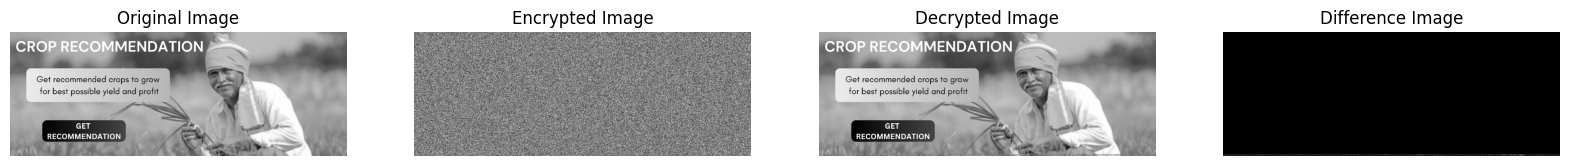

In [2]:
import numpy as np
from PIL import Image
import pywt
import wave
import struct
import matplotlib.pyplot as plt

def compute_image_characteristics(image_array):
    avg_intensity = np.mean(image_array)  # Average pixel intensity
    variance = np.var(image_array)  # Variance of pixel intensity
    histogram, _ = np.histogram(image_array, bins=256, range=(0, 255))
    probabilities = histogram / np.sum(histogram)
    entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation
    return avg_intensity, variance, entropy

def determine_block_size(image_shape):
    print(image_shape)
    height, width = image_shape
    smaller_dim = min(height, width)
    if smaller_dim <200:
        return 1
    if smaller_dim < 512:
        return 16  # Small images
    elif smaller_dim <= 2048:
        return 64  # Medium images
    else:
        return 64  # Large images

def divide_into_blocks(image_array, block_size):
    height, width = image_array.shape
    padded_height = (height + block_size - 1) // block_size * block_size
    padded_width = (width + block_size - 1) // block_size * block_size

    padded_image = np.zeros((padded_height, padded_width), dtype=image_array.dtype)
    padded_image[:height, :width] = image_array

    blocks = []
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            blocks.append(padded_image[i:i + block_size, j:j + block_size])
    return blocks, (height, width), (padded_height, padded_width)

def merge_blocks(blocks, original_shape, padded_shape, block_size):
    padded_height, padded_width = padded_shape
    merged_image = np.zeros((padded_height, padded_width), dtype=blocks[0].dtype)

    block_index = 0
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            merged_image[i:i + block_size, j:j + block_size] = blocks[block_index]
            block_index += 1

    return merged_image[:original_shape[0], :original_shape[1]]

def generate_chen_keys(size, avg_intensity, variance):
    x, y, z = avg_intensity / 255, variance / 255, 0.1  # Dynamic initialization
    a, b, c = 35 + avg_intensity % 10, 3 + variance % 5, 28  # Adjusted parameters
    keys = []
    for _ in range(size):
        dx = a * (y - x)
        dy = x * (c - z) - y
        dz = x * y - b * z
        x, y, z = x + dx * 0.011, y + dy * 0.01, z + dz * 0.01
        keys.append(x)
    return np.abs(np.array(keys)) % 256  # Normalize keys to range [0, 255]

def generate_lorenz_keys(size, avg_intensity, entropy):
    x, y, z = avg_intensity / 255, 0.5, entropy / 10  # Dynamic initialization
    sigma, rho, beta = 10 + entropy % 5, 28 + avg_intensity % 10, 2.667
    keys = []
    for _ in range(size):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        x, y, z = x + dx * 0.01, y + dy * 0.01, z + dz * 0.01
        keys.append(y)
    return np.abs(np.array(keys)) % 256  # Normalize keys to range [0, 255]

def generate_logistic_keys(size, variance, entropy):
    x = np.clip(variance / 255, 0.01, 0.99)  # Ensure x is in (0, 1)
    r = np.clip(3.99 - (entropy % 0.1), 3.57, 4.0)  # Ensure r is in (3.57, 4.0)
    keys = []
    for _ in range(size):
        x = r * x * (1 - x)  # Logistic map equation
        keys.append(x)
    return (np.array(keys) * 255).astype(np.uint8)

def image_to_audio(image_array, output_audio_path):
    flat_image = image_array.flatten()
    audio_data = struct.pack('<' + 'h' * len(flat_image), *flat_image.astype(np.int16))
    
    with wave.open(output_audio_path, 'w') as audio_file:
        audio_file.setnchannels(1)
        audio_file.setsampwidth(2)
        audio_file.setframerate(441000)
        audio_file.writeframes(audio_data)

def audio_to_image(input_audio_path, shape):
    with wave.open(input_audio_path, 'r') as audio_file:
        frames = audio_file.readframes(audio_file.getnframes())
        flat_image = np.array(struct.unpack('<' + 'h' * (len(frames) // 2), frames), dtype=np.int16)
    
    return flat_image.reshape(shape)

def generate_dynamic_sbox(size, hybrid_keys):
    chaotic_sequence = hybrid_keys[:size]
    return np.argsort(chaotic_sequence)

def encrypt_block_cbc(block, hybrid_keys, sbox, previous_block):
    flat_block = block.flatten()

    xor_block = flat_block ^ previous_block.flatten()

    permutation_indices = np.argsort(hybrid_keys[:len(flat_block)])
    permuted_block = xor_block[permutation_indices]
    substituted_block = sbox[permuted_block]

    return substituted_block.reshape(block.shape), substituted_block.flatten(), permutation_indices

def decrypt_block_cbc(block, previous_block, permutation_indices, sbox_inv):
    flat_block = block.flatten()

    substituted_block = np.array([sbox_inv[pixel] for pixel in flat_block])

    reverse_indices = np.argsort(permutation_indices)
    permuted_block = substituted_block[reverse_indices]

    decrypted_block = permuted_block ^ previous_block.flatten()

    return decrypted_block.reshape(block.shape)

def plot_images(original_image, encrypted_image, decrypted_image, shape):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(original_image.reshape(shape), cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(encrypted_image.reshape(shape), cmap='gray')
    axes[1].set_title("Encrypted Image")
    axes[1].axis('off')

    axes[2].imshow(decrypted_image.reshape(shape), cmap='gray')
    axes[2].set_title("Decrypted Image")
    axes[2].axis('off')

    difference_image = np.abs(original_image - decrypted_image)
    axes[3].imshow(difference_image.reshape(shape), cmap='gray')
    axes[3].set_title("Difference Image")
    axes[3].axis('off')

    plt.show()


def main(image_path):
    # Load image
    image = Image.open(image_path).convert('L')  # Grayscale
    image_array = np.array(image)

    # Determine block size dynamically
    block_size = determine_block_size(image_array.shape)
    print(f"Using block size: {block_size}x{block_size}")

    # Divide image into blocks
    blocks, original_shape, padded_shape = divide_into_blocks(image_array, block_size)

    avg_intensity, variance, entropy = compute_image_characteristics(image_array)

    chen_keys = generate_chen_keys(image_array.size, avg_intensity, variance)
    lorenz_keys = generate_lorenz_keys(image_array.size, avg_intensity, entropy)
    logistic_keys = generate_logistic_keys(image_array.size, variance, entropy)
    hybrid_keys = (lorenz_keys + logistic_keys + chen_keys) % 256

    sbox = generate_dynamic_sbox(256, hybrid_keys)
    sbox_inv = np.argsort(sbox)

    iv = np.random.randint(0, 256, (block_size, block_size), dtype=np.uint8)

    encrypted_blocks = []
    permutation_indices_list = []
    previous_block = iv  # Start with IV
    for block in blocks:
        encrypted_block, previous_block_flattened, permutation_indices = encrypt_block_cbc(
            block, hybrid_keys, sbox, previous_block
        )
        encrypted_blocks.append(encrypted_block)
        permutation_indices_list.append(permutation_indices)
        previous_block = previous_block_flattened.reshape(block.shape)  # Update to the current encrypted block for next iteration

    encrypted_image = merge_blocks(encrypted_blocks, original_shape, padded_shape, block_size)
    image_to_audio(encrypted_image, "output_audio.wav")

    extracted_image_array = audio_to_image("output_audio.wav", encrypted_image.shape)

    # Divide the extracted image into blocks
    extracted_blocks, _, _ = divide_into_blocks(extracted_image_array, block_size)
    decrypted_blocks = []
    previous_block = iv  # Start with IV again
    for i, block in enumerate(extracted_blocks):
        decrypted_block = decrypt_block_cbc(block, previous_block, permutation_indices_list[i], sbox_inv)
        decrypted_blocks.append(decrypted_block)
        previous_block = block  # Update to the current ciphertext block

    decrypted_image = merge_blocks(decrypted_blocks, original_shape, padded_shape, block_size)

    plot_images(image_array, encrypted_image, decrypted_image, image_array.shape)
    return image_array,encrypted_image,decrypted_image
if __name__ == "__main__":
    image_path = "C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/slider2.webp"  # Replace with your image path
    main(image_path)

In [ ]:
def calculate_npcr(image1, image2):
    diff = (image1 != image2).astype(np.uint8)
    npcr = np.sum(diff) / image1.size * 100
    return npcr

def calculate_uaci(image1, image2):
    diff = np.abs(image1 - image2).astype(np.float32)
    uaci = np.sum(diff) / (255 * image1.size) * 100
    return uaci

# Main function to test NPCR and UACI
if __name__ == "__main__":
    image_array,encryted_image,decryted_image = main("C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/slider2.webp")
    

In [15]:
def plot_images(original_image, encrypted_image, decrypted_image, shape):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(original_image.reshape(shape))
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(encrypted_image.reshape(shape))
    axes[1].set_title("Encrypted Image")
    axes[1].axis('off')

    axes[2].imshow(decrypted_image.reshape(shape))
    axes[2].set_title("Decrypted Image")
    axes[2].axis('off')

    difference_image = np.abs(original_image - decrypted_image)
    axes[3].imshow(difference_image.reshape(shape))
    axes[3].set_title("Difference Image")
    axes[3].axis('off')

    plt.show()

(512, 512, 3)
Using block size: 64x64


C:\Users\20092\AppData\Local\Temp\ipykernel_64596\4260332608.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


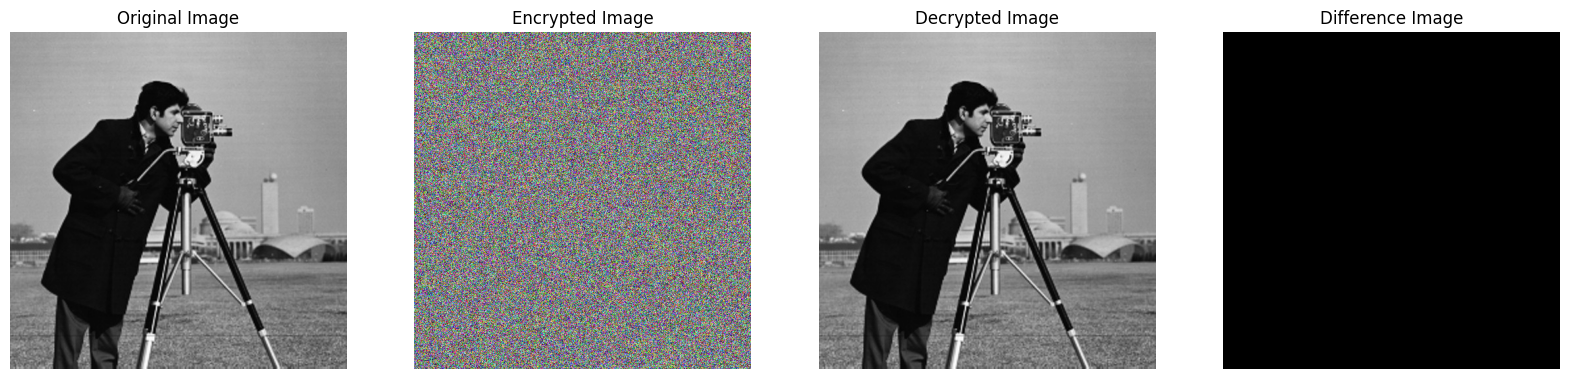

In [6]:
import numpy as np
from PIL import Image
import pywt
import wave
import struct
import matplotlib.pyplot as plt

def compute_image_characteristics(image_array):
    avg_intensity = np.mean(image_array)  # Average pixel intensity
    variance = np.var(image_array)  # Variance of pixel intensity
    histogram, _ = np.histogram(image_array, bins=256, range=(0, 255))
    probabilities = histogram / np.sum(histogram)
    entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation
    return avg_intensity, variance, entropy

def determine_block_size(image_shape):
    print(image_shape)
    height, width = image_shape[:2]
    smaller_dim = min(height, width)
    if smaller_dim <200:
        return 1
    if smaller_dim < 512:
        return 16  # Small images
    elif smaller_dim <= 2048:
        return 64  # Medium images
    else:
        return 64 # Large images

def divide_into_blocks(image_array, block_size):
    height, width, channels = image_array.shape
    padded_height = (height + block_size - 1) // block_size * block_size
    padded_width = (width + block_size - 1) // block_size * block_size

    padded_image = np.zeros((padded_height, padded_width, channels), dtype=image_array.dtype)
    padded_image[:height, :width, :] = image_array

    blocks = []
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            blocks.append(padded_image[i:i + block_size, j:j + block_size])
    return blocks, (height, width), (padded_height, padded_width)

def merge_blocks(blocks, original_shape, padded_shape, block_size):
    padded_height, padded_width = padded_shape
    merged_image = np.zeros((padded_height, padded_width, blocks[0].shape[2]), dtype=blocks[0].dtype)

    block_index = 0
    for i in range(0, padded_height, block_size):
        for j in range(0, padded_width, block_size):
            merged_image[i:i + block_size, j:j + block_size] = blocks[block_index]
            block_index += 1

    return merged_image[:original_shape[0], :original_shape[1], :]

def generate_chen_keys(size, avg_intensity, variance):
    x, y, z = avg_intensity / 255.0, variance / 255.0, 0.1  # Dynamic initialization
    a, b, c = 35 + avg_intensity % 10, 3 + variance % 5, 28  # Adjusted parameters
    keys = []
    for _ in range(size):
        dx = a * (y - x)
        dy = x * (c - z) - y
        dz = x * y - b * z
        x += dx * 0.01
        y += dy * 0.01
        z += dz * 0.01
        keys.append(x)
    return np.abs(np.array(keys)) % 256  # Normalize keys to range [0, 255]

def generate_lorenz_keys(size, avg_intensity, entropy):
    x, y, z = avg_intensity / 255.0, 0.5, entropy / 10.0  # Dynamic initialization
    sigma, rho, beta = 10 + entropy % 5, 28 + avg_intensity % 10, 2.667
    keys = []
    for _ in range(size):
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        x += dx * 0.01
        y += dy * 0.01
        z += dz * 0.01
        keys.append(y)
    return np.abs(np.array(keys)) % 256

def generate_logistic_keys(size, variance, entropy):
    x = np.clip(variance / 255.0, 0.01, 0.99)  
    r = np.clip(3.99 - (entropy % 0.1), 3.57, 4.0)  
    keys = []
    for _ in range(size):
        x = r * x * (1 - x)  
        keys.append(x)
    return (np.array(keys) * 255).astype(np.uint8)

def image_to_audio(image_array, output_audio_path):
    flat_image = image_array.flatten()
    audio_data = struct.pack('<' + 'h' * len(flat_image), *flat_image.astype(np.int16))
    
    with wave.open(output_audio_path, 'w') as audio_file:
        audio_file.setnchannels(1)
        audio_file.setsampwidth(2)
        audio_file.setframerate(504100)
        audio_file.writeframes(audio_data)

def audio_to_image(input_audio_path, shape):
    with wave.open(input_audio_path, 'r') as audio_file:
        frames = audio_file.readframes(audio_file.getnframes())
        flat_image = np.array(struct.unpack('<' + 'h' * (len(frames) // 2), frames), dtype=np.int16)
    
    return flat_image.reshape(shape)

def generate_dynamic_sbox(size, hybrid_keys):
    chaotic_sequence = hybrid_keys[:size]
    return np.argsort(chaotic_sequence)

def encrypt_block_cbc(block, hybrid_keys, sbox, previous_block):
    flat_block = block.flatten()

    xor_block = flat_block ^ previous_block.flatten()

    permutation_indices = np.argsort(hybrid_keys[:len(flat_block)])
    permuted_block = xor_block[permutation_indices]
    substituted_block = sbox[permuted_block]

    return substituted_block.reshape(block.shape), substituted_block.flatten(), permutation_indices

def decrypt_block_cbc(block, previous_block, permutation_indices, sbox_inv):
    flat_block = block.flatten()

    substituted_block = np.array([sbox_inv[pixel] for pixel in flat_block])

    reverse_indices = np.argsort(permutation_indices)
    permuted_block = substituted_block[reverse_indices]

    decrypted_block = permuted_block ^ previous_block.flatten()

    return decrypted_block.reshape(block.shape)



def main(image_path):
    # Load image
    image = Image.open(image_path).convert('RGB')  # Color image
    image_array = np.array(image)

    # Determine block size dynamically
    block_size = determine_block_size(image_array.shape)
    print(f"Using block size: {block_size}x{block_size}")

    # Divide image into blocks
    blocks, original_shape, padded_shape = divide_into_blocks(image_array, block_size)

    avg_intensity, variance, entropy = compute_image_characteristics(image_array)

    chen_keys = generate_chen_keys(image_array.size, avg_intensity, variance)
    lorenz_keys = generate_lorenz_keys(image_array.size, avg_intensity, entropy)
    logistic_keys = generate_logistic_keys(image_array.size, variance, entropy)
    hybrid_keys = (lorenz_keys + logistic_keys + chen_keys) % 256

    sbox = generate_dynamic_sbox(256, hybrid_keys)
    sbox_inv = np.argsort(sbox)

    iv = np.random.randint(0, 256, (block_size, block_size, 3), dtype=np.uint8)

    encrypted_blocks = []
    permutation_indices_list = []
    previous_block = iv  # Start with IV
    for block in blocks:
        encrypted_block, previous_block_flattened, permutation_indices = encrypt_block_cbc(
            block, hybrid_keys, sbox, previous_block
        )
        encrypted_blocks.append(encrypted_block)
        permutation_indices_list.append(permutation_indices)
        previous_block = previous_block_flattened.reshape(block.shape)  # Update to the current encrypted block for next iteration

    encrypted_image = merge_blocks(encrypted_blocks, original_shape, padded_shape, block_size)
    # image_to_audio(encrypted_image, "output_audio1.wav")

    # extracted_image_array = audio_to_image("output_audio1.wav", encrypted_image.shape)

    # Divide the extracted image into blocks
    extracted_blocks, _, _ = divide_into_blocks(encrypted_image, block_size)

    decrypted_blocks = []
    previous_block = iv  # Start with IV again
    for i, block in enumerate(extracted_blocks):
        decrypted_block = decrypt_block_cbc(block, previous_block, permutation_indices_list[i], sbox_inv)
        decrypted_blocks.append(decrypted_block)
        previous_block = block  # Update to the current ciphertext block
    decrypted_image = merge_blocks(decrypted_blocks, original_shape, padded_shape, block_size)

    plot_images(image_array, encrypted_image, decrypted_image, image_array.shape)

if __name__ == "__main__":
    # image_path = "C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/imresizer-1732212939706.jpg"  # Replace with your image path
    # main(image_path)
  
    # main("C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/slider2.webp")
    main("C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/cameraman.png")

In [3]:
import numpy as np
from PIL import Image

def encrypt_block_cbc(block, hybrid_keys, sbox, previous_block):
    flat_block = block.flatten()

    xor_block = flat_block ^ previous_block.flatten()

    permutation_indices = np.argsort(hybrid_keys[:len(flat_block)])
    permuted_block = xor_block[permutation_indices]
    substituted_block = sbox[permuted_block % len(sbox)]

    return substituted_block.reshape(block.shape), substituted_block.flatten(), permutation_indices

def decrypt_block_cbc(block, previous_block, permutation_indices, sbox_inv):
    flat_block = block.flatten()

    # Reverse substitution
    substituted_block = np.array([sbox_inv[pixel] for pixel in flat_block])

    # Reverse permutation
    reverse_indices = np.argsort(permutation_indices)
    permuted_block = substituted_block[reverse_indices]

    # XOR with previous block
    decrypted_block = permuted_block ^ previous_block.flatten()

    return decrypted_block.reshape(block.shape)

def main(image_path):
    # Load image
    image = Image.open(image_path).convert('RGB')  
    image_array = np.array(image)

    # Determine block size dynamically
    block_size = determine_block_size(image_array.shape)  # Assume this function is defined
    
    print(f"Using block size: {block_size}x{block_size}")

    # Divide image into blocks
    blocks, original_shape, padded_shape = divide_into_blocks(image_array, block_size)  # Assume this function is defined

    iv = np.random.randint(0, 256, (block_size, block_size, image_array.shape[2]), dtype=np.uint8)

    encrypted_blocks = []
    permutation_indices_list = []
    characteristics_list = []
    
    previous_block = iv  # Initialization Vector for CBC
    
    for block in blocks:
        # Compute block characteristics
        avg_intensity, variance, entropy = compute_image_characteristics(block)  # Assume this function is defined
        characteristics_list.append((avg_intensity, variance, entropy))

        # Generate keys and S-Box
        chen_keys = generate_chen_keys(block.size, avg_intensity, variance)  # Assume this function is defined
        lorenz_keys = generate_lorenz_keys(block.size, avg_intensity, entropy)  # Assume this function is defined
        logistic_keys = generate_logistic_keys(block.size, variance, entropy)  # Assume this function is defined
        hybrid_keys = (lorenz_keys + logistic_keys + chen_keys) % 256

        sbox = generate_dynamic_sbox(256, hybrid_keys)  # Assume this function is defined
        sbox_inv = np.argsort(sbox)

        encrypted_block, previous_block_flattened, permutation_indices = encrypt_block_cbc(
            block, hybrid_keys, sbox, previous_block
        )
        encrypted_blocks.append(encrypted_block)
        permutation_indices_list.append(permutation_indices)
        previous_block = previous_block_flattened.reshape(block.shape)  # Update to the current encrypted block

    encrypted_image = merge_blocks(encrypted_blocks, original_shape, padded_shape, block_size)  # Assume this function is defined
    # image_to_audio(encrypted_image, "output_audio1.wav")  # Assume this function is defined

    # extracted_image_array = audio_to_image("output_audio1.wav", encrypted_image.shape)  # Assume this function is defined

    # Divide the extracted image into blocks
    extracted_blocks, _, _ = divide_into_blocks(encrypted_image, block_size)

    decrypted_blocks = []
    previous_block = iv  # Start with IV again
    for i, block in enumerate(extracted_blocks):
        # Use stored characteristics for decryption
        avg_intensity, variance, entropy = characteristics_list[i]

        chen_keys = generate_chen_keys(block.size, avg_intensity, variance)
        lorenz_keys = generate_lorenz_keys(block.size, avg_intensity, entropy)
        logistic_keys = generate_logistic_keys(block.size, variance, entropy)
        hybrid_keys = (lorenz_keys + logistic_keys + chen_keys) % 256

        sbox = generate_dynamic_sbox(256, hybrid_keys)
        sbox_inv = np.argsort(sbox)

        decrypted_block = decrypt_block_cbc(block, previous_block, permutation_indices_list[i], sbox_inv)
        decrypted_blocks.append(decrypted_block)
        previous_block = block  # Update to the current ciphertext block

    decrypted_image = merge_blocks(decrypted_blocks, original_shape, padded_shape, block_size)  # Assume this function is defined

    plot_images(image_array, encrypted_image, decrypted_image,image_array.shape)  # Assume this function is defined


(384, 512, 3)
Using block size: 16x16


C:\Users\20092\AppData\Local\Temp\ipykernel_64596\4260332608.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)  # Entropy calculation


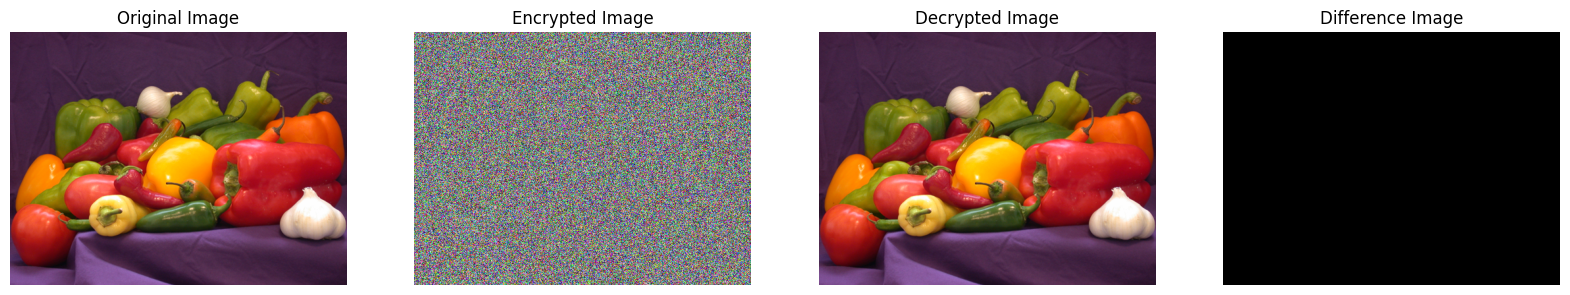

In [7]:
if __name__ == "__main__":
    # image_path = "C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/imresizer-1732212939706.jpg"  # Replace with your image path
    # main(image_path)
  
    main("C:/Users/20092/OneDrive/Documents/Bhumit/cyptography/peppers.png")